<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/T5_tst/blob/main/Copy_of_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [49]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [51]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### convert the data type

In [52]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
5-10yr,3363
2-5yr,2613
Above 10yr,2262
1-2yr,1756
Below 1yr,1342
No Licence,118
unknown,33


In [53]:
df['Service_year_of_vehicle'].value_counts()

,count
Service_year_of_vehicle,
Unknown,2883
2-5yrs,1792
Above 10yr,1324
5-10yrs,1280
1-2yr,827
Below 1yr,282


In [54]:
df['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


In [55]:
Casualty_svrt = {'1':1,'2': 2,'3':3,'na': None}

In [56]:
year = {'Below 1yr' : 0.5, '1-2yr': 1.5, '2-5yrs': 3.5,'2-5yr':3.5,'5-10yrs': 7.5, '5-10yr':7.5,'Above 10yr':15 , 'No Licence':None,'unknown': None}

In [57]:
Age_range = {'5':5 ,'18-30':28,'31-50':41 ,'Under 18':16,'Over 51': 55,'Unknown':None,'na':None}

In [58]:
df['Casualty_severity'] = df['Casualty_severity'].map(Casualty_svrt)

In [59]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].map(Age_range)

In [60]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].map(Age_range)

In [61]:
df['Driving_experience'] = df['Driving_experience'].map(year)

In [62]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].map(year)

In [63]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S')

In [64]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
28.0,3145
41.0,2455
16.0,1035
55.0,994
5.0,244


In [65]:
df['Age_band_of_driver'].value_counts()

,count
Age_band_of_driver,
28.0,4271
41.0,4087
55.0,1585
16.0,825


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           10768 non-null  float64       
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11336 non-null  float64       
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      5505 non-null   float64       
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [67]:
df.describe()

,Time,Age_band_of_driver,Driving_experience,Service_year_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity
count,12316,10768.000000,11336.000000,5505.000000,12316.000000,12316.000000,7873.000000,7873.000000
mean,1900-01-01 14:17:50.768106496,35.989042,6.316426,6.741780,2.040679,1.548149,33.172234,2.895466
min,1900-01-01 00:01:00,16.000000,0.500000,0.500000,1.000000,1.000000,5.000000,1.000000
25%,1900-01-01 10:31:00,28.000000,1.500000,3.500000,2.000000,1.000000,28.000000,3.000000
50%,1900-01-01 15:10:00,41.000000,3.500000,3.500000,2.000000,1.000000,28.000000,3.000000
75%,1900-01-01 18:10:00,41.000000,7.500000,7.500000,2.000000,2.000000,41.000000,3.000000
max,1900-01-01 23:59:00,55.000000,15.000000,15.000000,7.000000,8.000000,55.000000,3.000000
std,NaN,10.893503,4.989088,5.107354,0.688790,1.007179,12.382673,0.316583


In [68]:
df = df.drop(columns=['Work_of_casuality','Owner_of_vehicle','Vehicle_driver_relation','Educational_level'])

In [69]:
df = df.dropna(subset=['Types_of_Junction','Road_allignment','Driving_experience','Type_of_collision'])

In [70]:
df.duplicated().sum()

0

In [71]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,1344
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,744
Service_year_of_vehicle,5616
Defect_of_vehicle,3636
Area_accident_occured,174
Lanes_or_Medians,304


In [72]:
df['Accident_severity'].isnull().sum()

0

In [73]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,1344
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,744
Service_year_of_vehicle,5616
Defect_of_vehicle,3636
Area_accident_occured,174
Lanes_or_Medians,304


In [74]:
df.shape

(10265, 28)

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [75]:
X = df.drop(columns=['Accident_severity'])

In [76]:
y = df['Accident_severity']

In [77]:
X_train , X_test , y_train,y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [78]:
train = X_train

In [79]:
train['Accident_severity'] = y_train

In [80]:
train

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2374,1900-01-01 21:41:00,Friday,28.0,Male,7.5,NaN,NaN,No defect,Residential areas,other,...,2,Entering a junction,Pedestrian,Female,55.0,3.0,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10108,1900-01-01 16:36:00,Thursday,41.0,Male,0.5,Automobile,NaN,NaN,NaN,Two-way (divided with broken lines road marking),...,1,Going straight,Driver or rider,Female,28.0,3.0,Normal,Not a Pedestrian,No distancing,Fatal injury
2496,1900-01-01 02:31:00,Sunday,55.0,Male,15.0,Automobile,7.5,No defect,Church areas,Undivided Two way,...,5,Going straight,Passenger,Female,16.0,3.0,Normal,Not a Pedestrian,Overspeed,Slight Injury
67,1900-01-01 13:01:00,Thursday,28.0,Male,15.0,Automobile,15.0,No defect,Office areas,other,...,1,Unknown,Driver or rider,Male,28.0,3.0,Normal,Not a Pedestrian,No distancing,Slight Injury
3339,1900-01-01 12:37:00,Wednesday,28.0,Male,15.0,Taxi,7.5,NaN,Office areas,Double carriageway (median),...,1,Going straight,Driver or rider,Male,55.0,3.0,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,1900-01-01 18:10:00,Monday,41.0,Male,3.5,Public (12 seats),NaN,NaN,Other,Two-way (divided with broken lines road marking),...,3,Going straight,Passenger,Male,5.0,3.0,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
5760,1900-01-01 09:15:00,Tuesday,55.0,Male,3.5,Public (12 seats),15.0,No defect,School areas,Undivided Two way,...,1,Going straight,Passenger,Female,55.0,3.0,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
5982,1900-01-01 17:30:00,Sunday,28.0,Male,7.5,Lorry (11?40Q),0.5,No defect,Residential areas,Two-way (divided with broken lines road marking),...,1,Other,Driver or rider,Male,28.0,2.0,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
946,1900-01-01 14:45:00,Saturday,41.0,Male,7.5,Automobile,NaN,NaN,Office areas,One way,...,2,Going straight,na,na,NaN,NaN,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: >

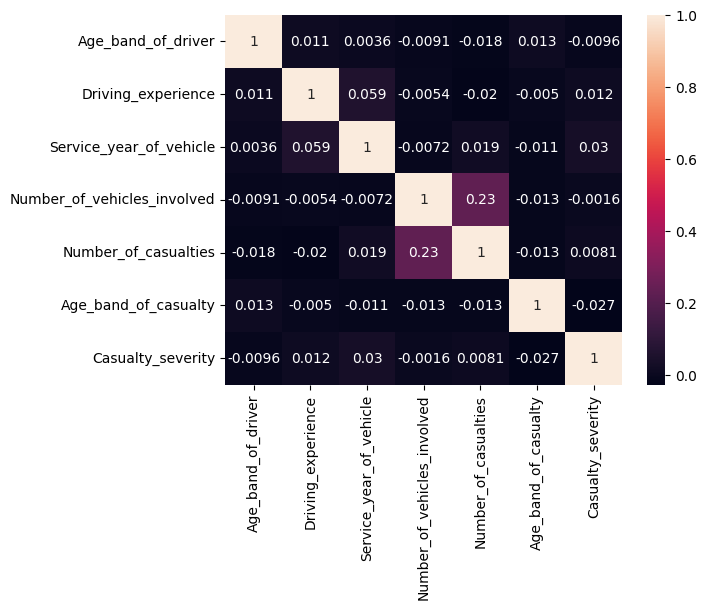

In [132]:
cor = train.corr(numeric_only=True)
sns.heatmap(cor,annot=True)

<Axes: >

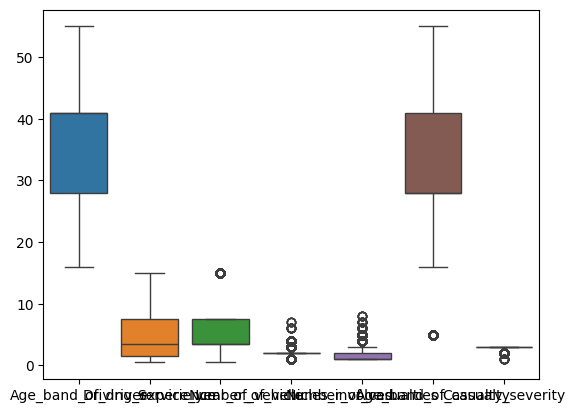

In [147]:
sns.boxplot(train)

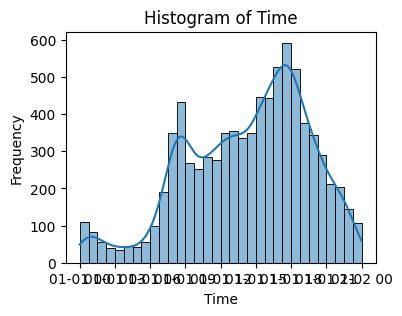

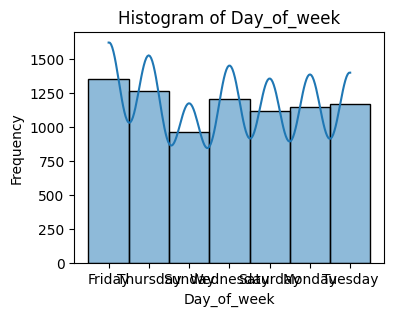

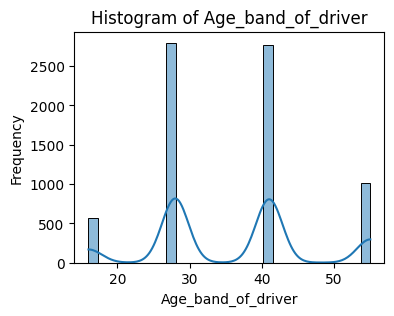

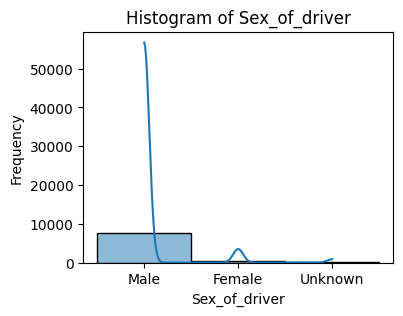

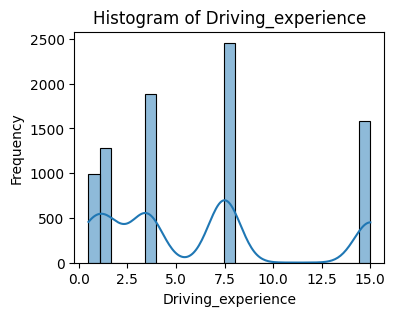

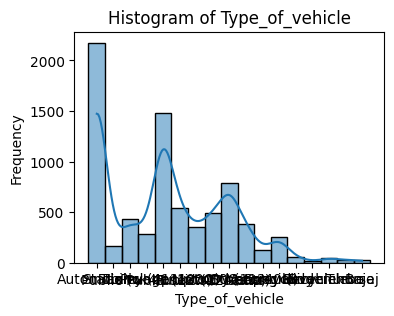

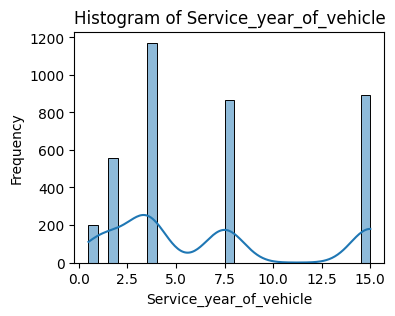

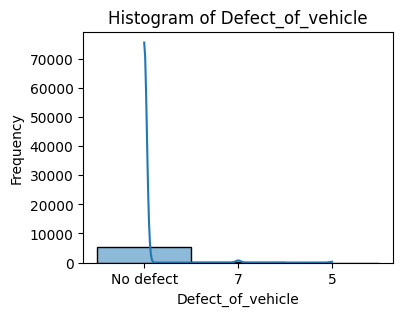

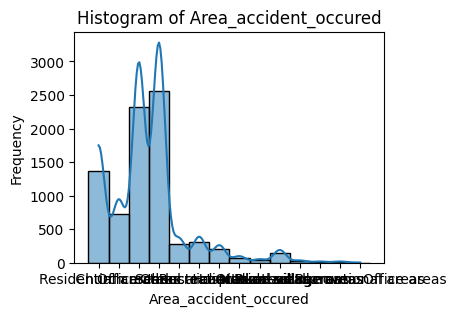

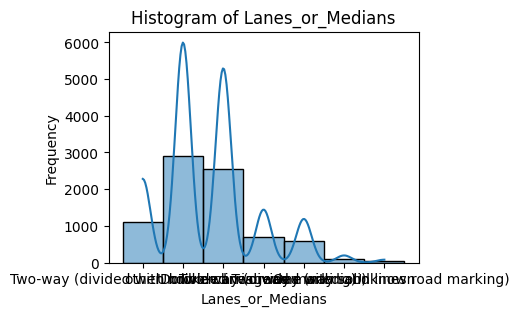

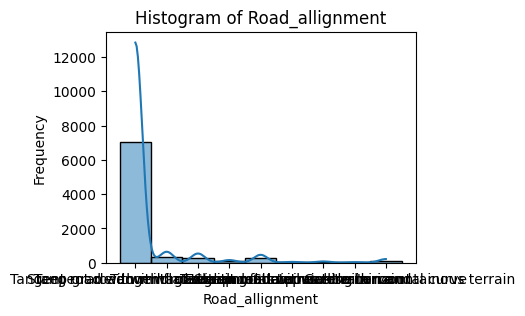

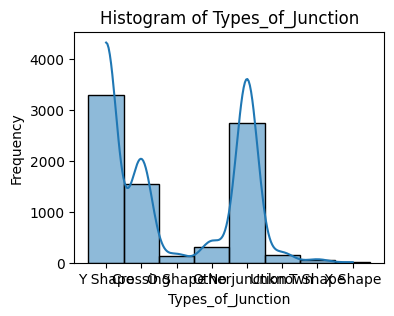

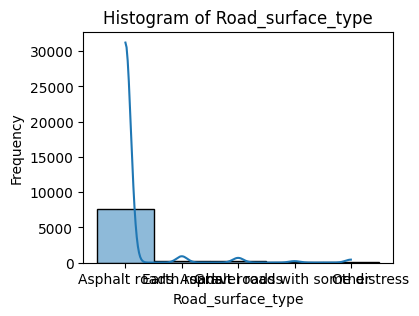

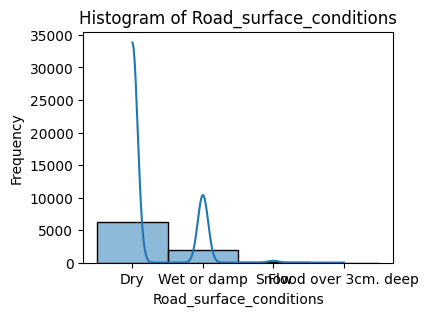

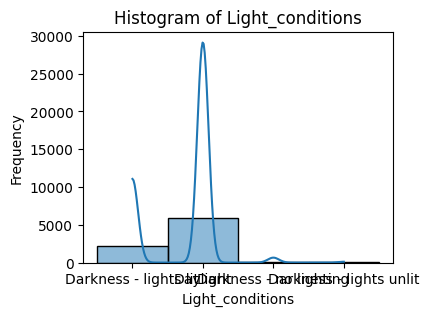

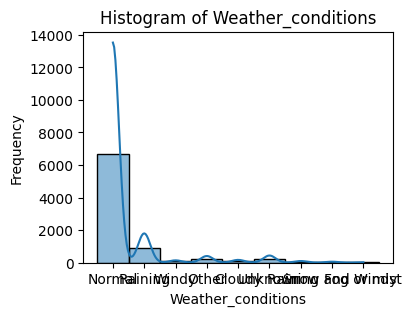

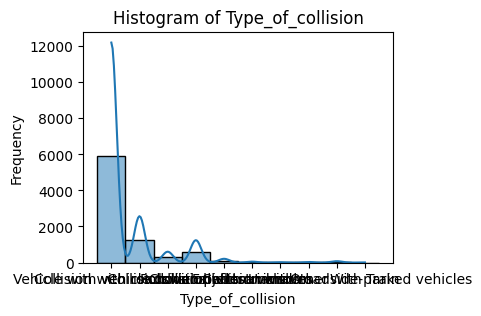

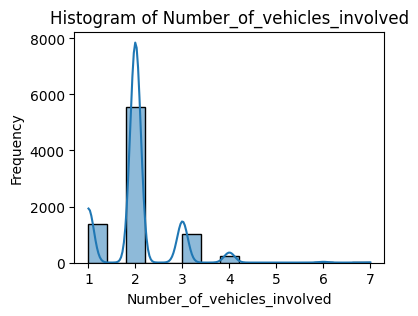

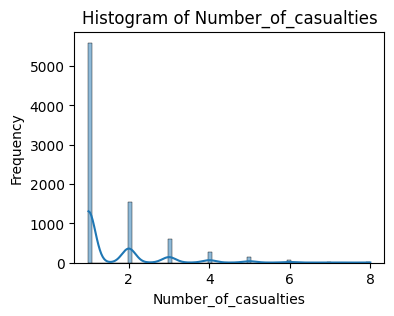

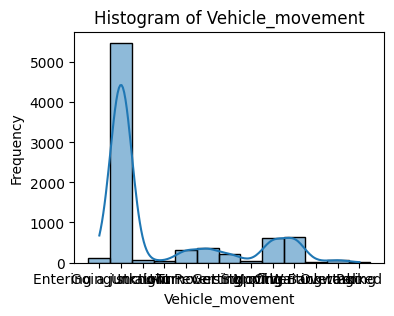

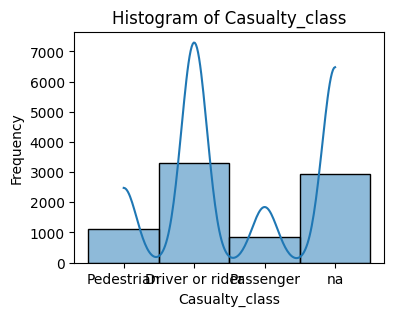

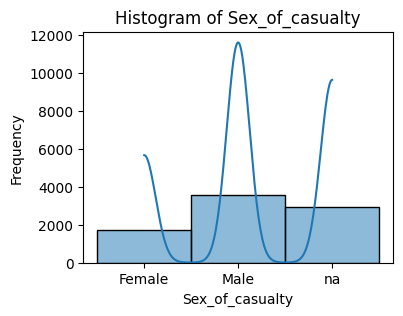

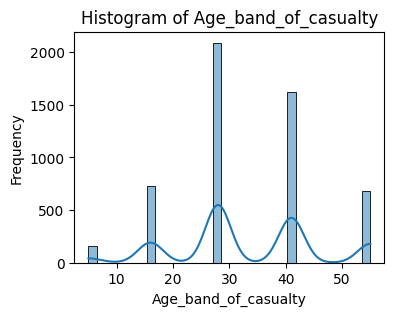

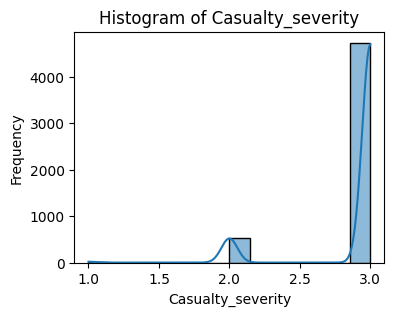

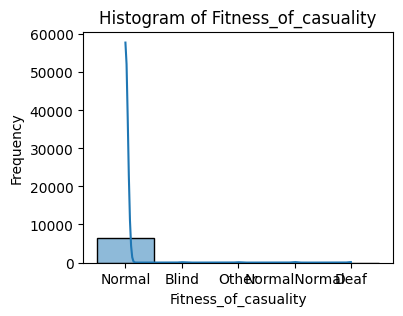

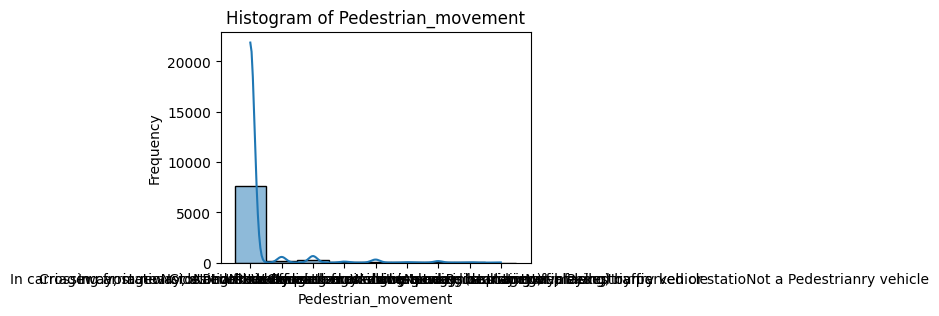

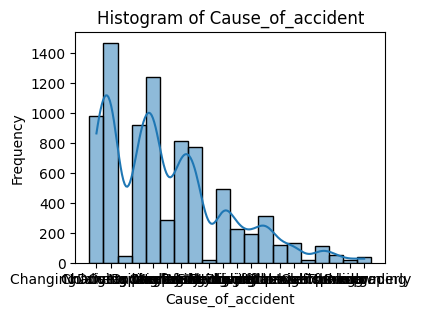

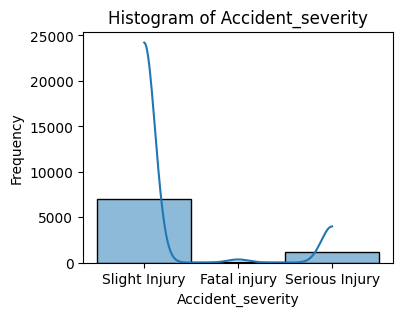

In [141]:
for column in train.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(train[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: ylabel='Count'>

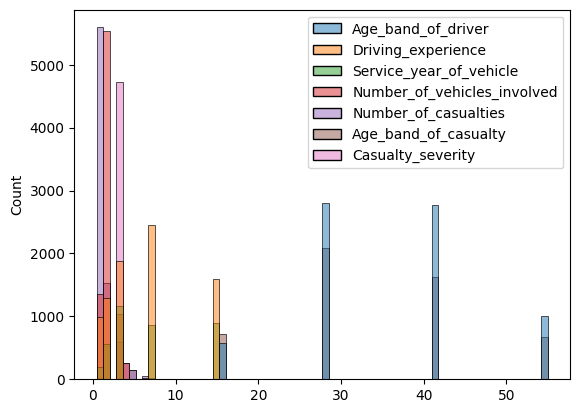

In [135]:
sns.histplot(train)

In [ ]:
sns.lineplot(data=df,x=)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [123]:

num_pipe_knn = make_pipeline(KNNImputer(n_neighbors=5),StandardScaler() )

num_pipe = make_pipeline(StandardScaler(),SimpleImputer())

time_pipe = make_pipeline(KNNImputer(n_neighbors=5))

cat = make_pipeline(OneHotEncoder())

pipe_proc = ColumnTransformer([('num_with_knn',num_pipe_knn,['Number_of_casualties','Number_of_vehicles_involved','Casualty_severity']),
                               ('num_with_mode',num_pipe , ['Age_band_of_driver','Driving_experience','Age_band_of_casualty']),
                               ('cat',cat , ['Day_of_week','Sex_of_driver','Type_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty','Fitness_of_casuality','Pedestrian_movement','Cause_of_accident','Accident_severity']),
('time', time_pipe,['Time'])
                               ])

In [124]:
X_train_proccess =  pipe_proc.fit_transform(X_train)

In [151]:

y_train_proc= fit()

NameError: name 'fit' is not defined

In [ ]:
print(X_train_proccess)

In [133]:
# cor = X_train_proccess.corr(numeric_only=True)
# sns.heatmap(cor,annot=True)

AttributeError: 'csr_matrix' object has no attribute 'corr'

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [150]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_proccess,y_train)

ValueError: could not convert string to float: 'Slight Injury'

#### Decision Tree Classifier

In [ ]:
fr sklearn.tree

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: